### Imports

In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import math
import numpy as np

### Constants

In [4]:
# DataFrame columns
column_names = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Street Address', 'City', 'State']

# Files
data_folder = "data/"
shop1_file = data_folder + 'Shop1.csv'
shop2_file = data_folder + 'Shop2.xlsx'
shop3_file = data_folder + 'Shop3.json'
shop4_file = data_folder + 'Shop4.xml'
shop5_file = data_folder + 'Shop5.parquet'
shop6_file = data_folder + 'Shop6.db'

### Pre processing

#### 2.1.1 Shop 1 (CSV)

In [5]:
df_shop1 = pd.read_csv(shop1_file)
df_shop1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street Address,City,State
0,182436,AAA Batteries (4-pack),6,2.99,2021-01-08 09:11:00,642 Highland St,San Francisco,CA
1,182437,AA Batteries (4-pack),2,3.84,2021-01-15 22:25:00,317 Center St,New York City,NY
2,182438,Flatscreen TV,1,300.00,2021-01-18 09:07:00,488 Adams St,San Francisco,CA
3,182446,USB-C Charging Cable,2,11.95,2021-01-20 23:35:00,882 Jackson St,San Francisco,CA
4,182456,AAA Batteries (4-pack),4,2.99,2021-01-21 17:10:00,352 5th St,New York City,NY
...,...,...,...,...,...,...,...,...
25257,342300,AAA Batteries (4-pack),12,2.99,2021-12-13 00:06:00,913 South St,New York City,NY
25258,342304,Lightning Charging Cable,2,14.95,2021-12-15 12:51:00,473 Hill St,San Francisco,CA
25259,342308,Flatscreen TV,1,300.00,2021-12-28 10:08:00,435 Willow St,Dallas,TX
25260,342310,Wired Headphones,2,11.99,2021-12-06 15:03:00,504 1st St,San Francisco,CA


#### 2.1.2 Shop 2 (Excel)

In [6]:
df_shop2 = pd.read_excel(shop2_file).dropna(axis=0, how='any')
df_shop2


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street Address,City,State
1,182422.0,USB-C Charging Cable,1.0,11.0,2021-01-07 15:02:00,405 6th St,Dallas,TX
2,182429.0,Lightning Charging Cable,2.0,15.0,2021-01-22 20:41:00,94 5th St,New York City,NY
3,182430.0,USB-C Charging Cable,2.0,11.0,2021-01-16 14:11:00,644 Main St,San Francisco,CA
4,182439.0,Apple Airpods Headphones,1.0,145.0,2021-01-15 08:43:00,651 Hill St,Atlanta,GA
5,182442.0,iPhone,1.0,800.0,2021-01-08 13:03:00,507 Chestnut St,San Francisco,CA
...,...,...,...,...,...,...,...,...
40469,342328.0,27in FHD Monitor,1.0,139.0,2021-12-17 15:59:00,181 River St,Atlanta,GA
40470,342336.0,34in Ultrawide Monitor,1.0,369.0,2021-12-13 13:41:00,188 West St,New York City,NY
40471,342339.0,Apple Airpods Headphones,1.0,145.0,2021-12-08 14:36:00,113 4th St,Seattle,WA
40472,342345.0,27in FHD Monitor,1.0,139.0,2021-12-18 16:29:00,374 Cherry St,New York City,NY


#### 2.1.3 Shop 3 (JSON)

In [7]:
df_shop3 = pd.read_json(shop3_file, orient='split')
indexInconsistent = df_shop3[df_shop3['Order ID']=='Order ID'].index
df_shop3.drop(indexInconsistent, inplace=True)
for index, row in df_shop3.iterrows():
    row['Order Date'] = pd.to_datetime(row['Order Date'], format='%m/%d/%y %H:%M')
    
df_shop3

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street Address,City,State
1,182445,Wired Headphones,2,11.99,2021-01-13 13:00:00,815 Johnson St,Austin,TX
2,182451,iPhone,1,699.99,2021-01-23 20:26:00,843 5th St,Atlanta,GA
3,182459,AAA Batteries (4-pack),6,2.99,2021-01-18 16:01:00,766 Chestnut St,Austin,TX
4,182464,Apple Airpods Headphones,1,149.99,2021-01-17 02:01:00,742 Cedar St,Atlanta,GA
5,182474,AAA Batteries (4-pack),2,2.99,2021-01-15 00:17:00,790 Jackson St,Atlanta,GA
...,...,...,...,...,...,...,...,...
30860,342331,27in 4K Gaming Monitor,1,389.99,2021-12-28 21:05:00,977 Washington St,Boston,MA
30861,342334,Bose SoundSport Headphones,1,99.99,2021-12-09 10:38:00,964 Dogwood St,Los Angeles,CA
30862,342335,AAA Batteries (4-pack),8,2.99,2021-12-28 16:14:00,759 Lakeview St,San Francisco,CA
30863,342340,USB-C Charging Cable,1,11.99,2021-12-29 11:33:00,427 4th St,San Francisco,CA


#### 2.1.4 Shop 4 (XML)

In [8]:
df_shop4 = pd.read_xml(shop4_file).drop(['processedBy'], axis=1).rename(columns={
    'orderId': 'Order ID',
    'product': 'Product',
    'quantityOrdered': 'Quantity Ordered',
    'priceEach': 'Price Each',
    'orderDate': 'Order Date',
    })
df_shop4[['Street Address', 'City', 'State']] = df_shop4['purchaseAddress'].str.split(', ', 0, expand=True)
df_shop4 = df_shop4.drop(['purchaseAddress'], axis=1)
df_shop4

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street Address,City,State
0,182448,Apple Airpods Headphones,1,169.00,2021-01-07 22:33:00,981 8th St,Atlanta,GA
1,182512,Wired Headphones,1,13.99,2021-01-17 19:22:00,230 14th St,Austin,TX
2,182525,Bose SoundSport Headphones,1,109.00,2021-01-21 14:32:00,310 Maple St,Dallas,TX
3,182541,27in FHD Monitor,1,159.00,2021-01-04 19:53:00,92 7th St,San Francisco,CA
4,182548,ThinkPad Laptop,1,1099.00,2021-01-30 16:34:00,158 Church St,Austin,TX
...,...,...,...,...,...,...,...,...
10020,342247,iPhone,1,749.00,2021-12-08 13:45:00,154 12th St,New York City,NY
10021,342247,Lightning Charging Cable,2,16.99,2021-12-08 13:45:00,154 12th St,New York City,NY
10022,342249,Wired Headphones,1,13.99,2021-12-23 14:08:00,837 11th St,Dallas,TX
10023,342280,Lightning Charging Cable,2,16.99,2021-12-23 15:03:00,150 North St,New York City,NY


#### 2.1.5 Shop 5 (Parquet)

In [9]:
df_shop5 = pd.read_parquet(shop5_file)
df_test = pd.read_parquet(shop5_file)
df_test_tmp = df_test
def product_price(product_name):
    return df_shop5.loc[(df_shop5['Product'] == product_name) & (df_shop5['Price Each'] != 0.00)].head(1)["Price Each"]
    # for index, row in df_shop5.iterrows():
        # if row['Product'] == product_name and row['Price Each'] != 0.00:
        #     return row['Price Each']

for index, row in df_shop5.iterrows():
    if row['Price Each'] == 0.00:
        df_shop5.at[index, 'Price Each'] = product_price(row['Product'])

df_shop5

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street Address,City,State
0,182419,Flatscreen TV,1,299.00,2021-01-07 11:59:00,79 13th St,New York City,NY
1,182423,Macbook Pro Laptop,1,1649.00,2021-01-23 13:56:00,851 West St,San Francisco,CA
2,182424,34in Ultrawide Monitor,1,369.99,2021-01-10 11:05:00,634 West St,San Francisco,CA
3,182426,Google Phone,1,599.00,2021-01-18 16:48:00,295 11th St,San Francisco,CA
4,182427,27in FHD Monitor,1,139.99,2021-02-01 01:15:00,482 Sunset St,Los Angeles,CA
...,...,...,...,...,...,...,...,...
45420,342337,USB-C Charging Cable,1,11.49,2021-12-28 17:10:00,231 Washington St,San Francisco,CA
45421,342341,LG Dryer,1,579.00,2021-12-06 12:21:00,809 Pine St,Seattle,WA
45422,342343,Lightning Charging Cable,1,14.49,2021-12-01 20:06:00,206 North St,Los Angeles,CA
45423,342344,Wired Headphones,1,11.49,2021-12-08 00:49:00,220 5th St,Portland,OR


#### 2.1.6 Shop 6 (SQLite)

In [10]:
shops_list = [df_shop1, df_shop2, df_shop3, df_shop4, df_shop5]
cnx = sqlite3.connect(shop6_file)
df_shop6 = pd.read_sql_query("SELECT * FROM sales", cnx)


df_shop6 = df_shop6.rename(columns={
    'orderId': 'Order ID',
    'product': 'Product',
    'priceEach': 'Price Each',
    'orderDate': 'Order Date',
    'streetAddress': 'Street Address',
    'city': 'City',
    'state': 'State'
    })

def means_shops(product_name):
    return int(round(pd.Series([ shop.loc[shop["Product"] == product_name]["Quantity Ordered"].mean() for shop in shops_list]).mean()))
df_shop6['Quantity Ordered'] = df_shop6.apply(lambda x: means_shops(x["Product"]), axis=1)
df_shop6

,Order ID,Product,Price Each,Order Date,Street Address,City,State,Quantity Ordered
0,182421,AAA Batteries (4-pack),2.99,2021-01-10 20:55:00,975 Main St,Dallas,TX,3
1,182425,20in Monitor,99.99,2021-01-23 20:07:00,1 Lake St,San Francisco,CA,1
2,182431,AA Batteries (4-pack),3.99,2021-01-24 12:02:00,897 Pine St,San Francisco,CA,3
3,182449,AAA Batteries (4-pack),2.99,2021-01-09 11:22:00,482 North St,New York City,NY,3
4,182455,Wired Headphones,11.99,2021-01-18 21:26:00,644 Adams St,Seattle,WA,2
...,...,...,...,...,...,...,...,...
15248,342315,Flatscreen TV,299.99,2021-12-22 12:34:00,568 South St,New York City,NY,1
15249,342329,Lightning Charging Cable,14.99,2021-12-25 08:29:00,139 14th St,San Francisco,CA,2
15250,342332,Google Phone,599.99,2021-12-19 17:47:00,917 Spruce St,Austin,TX,1
15251,342338,Apple Airpods Headphones,149.99,2021-12-02 19:45:00,712 Cedar St,Los Angeles,CA,1


### Data Analysis

#### 2.2.1 Sales vs Shop

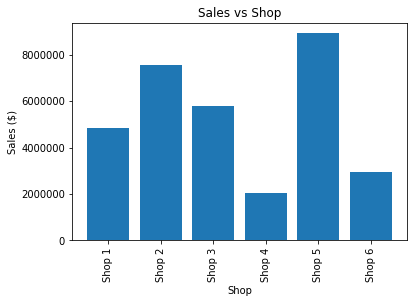

The best shop is: Shop 5 with a total of: 8926754.- 


In [11]:
shops_list = [df_shop1, df_shop2, df_shop3, df_shop4, df_shop5, df_shop6]
shops = ['Shop 1', 'Shop 2', 'Shop 3', 'Shop 4', 'Shop 5', 'Shop 6']
#sales = [(df_shop1['Price Each']*df_shop1['Quantity Ordered']).sum(), (df_shop2['Price Each']*df_shop2['Quantity Ordered']).sum(), 100, (df_shop4['Price Each']*df_shop4['Quantity Ordered']).sum(), (df_shop5['Price Each']*df_shop5['Quantity Ordered']).sum(), 50]
sales = [(i['Price Each']*i['Quantity Ordered']).sum() for i in shops_list]
# print(sum(sales))
# print((df_shop5['Price Each']*df_shop5['Quantity Ordered']).sum())

plt.bar(shops, sales)
plt.xticks(shops, rotation="vertical")
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales vs Shop', color='black')
plt.ylabel('Sales ($)')
plt.xlabel('Shop')
plt.show()
print(F'The best shop is: {shops[pd.Series(sales).idxmax()]} with a total of: {round(max(sales))}.- ')

#### 2.2.2 Sales vs Month

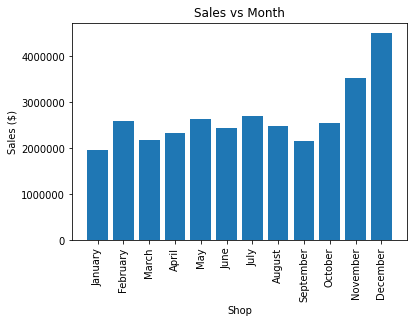

The best seller month is : December with a total of: 4512073.- 


In [12]:


shops_list = [df_shop1, df_shop2, df_shop3, df_shop4, df_shop5, df_shop6]
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sales = [sum([shop.loc[pd.to_datetime(shop['Order Date']).dt.strftime('%B') == m].apply(lambda x : x['Price Each'] * x['Quantity Ordered'], axis=1).sum() for shop in shops_list]) for m in month]
test = sum([shop.apply(lambda x : x['Price Each'] * x['Quantity Ordered'], axis=1).sum() for shop in shops_list])    #Only for testing

assert round(sum(sales)) == round(test) # Assert that sum of month is equal to sum of every sell in every shops for every times

plt.bar(month, sales)
plt.xticks(month, rotation="vertical")
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales vs Month', color='black')
plt.ylabel('Sales ($)')
plt.xlabel('Shop')
plt.show()
print(F'The best seller month is : {month[pd.Series(sales).idxmax()]} with a total of: {round(max(sales))}.- ')

#### 2.2.3 Sales vs City

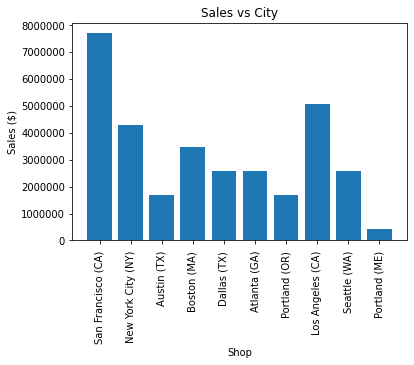

The best seller City is : San Francisco (CA)  with a total of: 7700902.- 


In [13]:
shops_list = [df_shop1, df_shop2, df_shop3, df_shop4, df_shop5, df_shop6]
towns = pd.concat(shops_list)[['City', 'State']].drop_duplicates()
towns_labels = towns.apply(lambda x: x['City']+' ('+x['State']+') ', axis=1)
sales = [sum([shop.loc[pd.to_datetime(shop['Order Date']).dt.strftime('%B') == m].apply(lambda x : x['Price Each'] * x['Quantity Ordered'], axis=1).sum() for shop in shops_list]) for m in month]

sales = towns.apply(lambda x: sum([shop.loc[(shop['City'] == x['City']) & (shop['State'] == x['State'])].apply(lambda x : x['Price Each'] * x['Quantity Ordered'], axis=1).sum()  for shop in shops_list]), axis=1)


test = sum([shop.apply(lambda x : x['Price Each'] * x['Quantity Ordered'], axis=1).sum() for shop in shops_list])    #Only for testing
assert round(sum(sales)) == round(test) # Assert that sum of month is equal to sum of every sell in every shops for every times

plt.bar(towns_labels, sales)
plt.xticks(towns_labels, rotation="vertical")
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales vs City', color='black')
plt.ylabel('Sales ($)')
plt.xlabel('Shop')
plt.show()
print(F'The best seller City is : {towns_labels[pd.Series(sales).idxmax()]} with a total of: {round(max(sales))}.- ')

#### 2.2.4 Number of Orders vs Hour

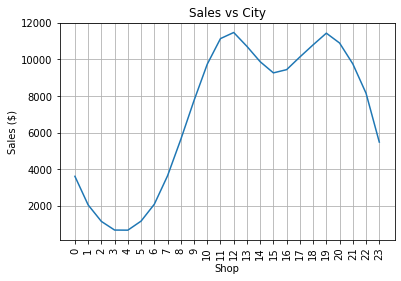

The best seller hour is : 12 with a total of: 11464 orders 
The best seller hour is : 19 with a total of: 11427 orders 
The best seller hour is : 11 with a total of: 11132 orders 


[None, None, None]

In [14]:
shops_list = [df_shop1, df_shop2, df_shop3, df_shop4, df_shop5, df_shop6]
hours = [i for i in range(0, 24)]
sales = [sum([  shop.loc[pd.to_datetime(shop['Order Date']).dt.hour == h].shape[0] for shop in shops_list]) for h in hours]
plt.plot(hours, sales)
plt.grid(visible=True)
plt.xticks(hours, rotation="vertical")
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales vs City', color='black')
plt.ylabel('Sales ($)')
plt.xlabel('Shop')
plt.show()
[ print(F'The best seller hour is : {best} with a total of: {sales[best]} orders ') for best in pd.Series(sales).nlargest(3).index]


#### 2.2.5 Products sold together

In [127]:
shops_list = [df_shop1, df_shop3, df_shop4, df_shop5, df_shop6]
list_of_product = pd.concat(shops_list)[['Product']].drop_duplicates()["Product"]
df = pd.DataFrame(columns=list_of_product)
for p in list_of_product :
    df = pd.concat([pd.DataFrame([[0]*len(list_of_product)], index=[p], columns=list_of_product), df])
for shop in shops_list:
    order_list = shop['Order ID'].drop_duplicates().to_list()
    product_ordered = [shop.loc[shop['Order ID'] == order]["Product"] for order in order_list]
    for p in product_ordered:
        p = p.drop_duplicates() #If a product is ordered twice with same order ID but on 2 differents lines, it cause a bug so we delete this case
        for p1 in p:
            for p2 in p:
                df.at[p1, p2] +=1


#-- For testing purpose --#
df_all = pd.concat(shops_list)
for p in list_of_product:
    expected = len(df_all.loc[df_all["Product"] == p][["Order ID", "Product"]].drop_duplicates().index)
    assert_msg = F'Product {p} expected {expected} but got {df.at[p,p]}'
    assert df.at[p,p] == expected, assert_msg
#-------------------------#

for p in list_of_product:
    df.at[p,p] = 0
    found = False
    for index, row in df.iterrows():
        if index == p:
            found = True
        if found :
            df.at[index, p] = 0
N_MAX = 10
for i in range(N_MAX):
    best = df.stack().index[np.argmax(df.values)]
    print(F'{best} : {df.at[best[0], best[1]]}')
    df.at[best[0], best[1]] = 0

('iPhone', 'Lightning Charging Cable') : 747
('Google Phone', 'USB-C Charging Cable') : 647
('Wired Headphones', 'iPhone') : 348
('Google Phone', 'Wired Headphones') : 252
('Apple Airpods Headphones', 'iPhone') : 240
('Vareebadd Phone', 'USB-C Charging Cable') : 232
('Google Phone', 'Bose SoundSport Headphones') : 169
('Wired Headphones', 'USB-C Charging Cable') : 141
('Wired Headphones', 'Lightning Charging Cable') : 123
('Vareebadd Phone', 'Wired Headphones') : 90
